# Analisis Exploratorio de Datos (EDA)


## 0. Introduccion

**Que es un EDA** 

- Ayuda a comprender de mejor forma un conjunto de datos
- Nos permite identificar patrones, detectar anomalias, verificar suposiciones y resumir las principales caracteristicas de lo que estamos analizando.


**DATASET "UFC Fighters' Statistics Dataset" From kaggle**

El dataset "ufc fighters" nos trae estadisticas sobre los peleadores que estan en el roaster del UFC, incluye informacion como victorias, derrotas, empates, atributos fisicos (altura, peso, alcance, etc), estilo de pelea (mixto, grappler, stricker, etc) y logros alcanzados a lo largo de sus trayectorias

**Objetivo**

El objetivo principal de es este proyecto es construir un modelo que nos permita descubrir que atributos fisicos son clave para el exito dentro de la UFC

# 1. Inicializacion y preparacion de los Datos 

## 1.1 Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1.2 Ajustes iniciales

In [5]:
# Configuramos el estilos de plt
plt.style.use("bmh")
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

## Carga y procesamiento del Dataset

In [8]:
## 2.1 Lectura de datos

In [7]:
df = pd.read_csv('ufc-fighters-statistics.csv')
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


## 2.2 Preprocesamiento

In [9]:
# Renombramos las variables para facilitar su uso
df.rename({'name':'Nombres','wins':'Victorias','losses':'Derrotas','draws':'Empates','height_cm':'Altura (cm)',
          'weight_in_kg':'Peso (kg)',
          'reach_in_cm':'Alcance (cm)', 'stance':'Estilo de pelea'},
          axis=1, inplace=True)

## 3. Limpieza de datos

In [11]:
atributos = ['Nombres', 'Victorias', 'Derrotas', 'Empates','Altura (cm)', 'Peso (kg)', 'Alcance (cm)', 'Estilo de pelea']
df_atributos = df[atributos].copy()

In [13]:
df_atributos.head(5)

,Nombres,Victorias,Derrotas,Empates,Altura (cm),Peso (kg),Alcance (cm),Estilo de pelea
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox
1,Daniel McWilliams,15,37,0,185.42,83.91,NaN,NaN
2,Dan Molina,13,9,0,177.80,97.98,NaN,NaN
3,Paul Ruiz,7,4,0,167.64,61.23,NaN,NaN
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox


In [15]:
df_atributos = df_atributos.dropna()
df_atributos.head(5)

,Nombres,Victorias,Derrotas,Empates,Altura (cm),Peso (kg),Alcance (cm),Estilo de pelea
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox
11,Bo Nickal,5,0,0,185.42,83.91,193.04,Southpaw
17,Westin Wilson,16,8,0,185.42,65.77,185.42,Southpaw
22,Dione Barbosa,6,2,0,167.64,56.70,167.64,Orthodox


In [17]:
df_atributos.count()

Nombres            2166
Victorias          2166
Derrotas           2166
Empates            2166
Altura (cm)        2166
Peso (kg)          2166
Alcance (cm)       2166
Estilo de pelea    2166
dtype: int64

## Analisis Descriptivo

In [19]:
df_atributos.head(10)

,Nombres,Victorias,Derrotas,Empates,Altura (cm),Peso (kg),Alcance (cm),Estilo de pelea
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox
11,Bo Nickal,5,0,0,185.42,83.91,193.04,Southpaw
17,Westin Wilson,16,8,0,185.42,65.77,185.42,Southpaw
22,Dione Barbosa,6,2,0,167.64,56.70,167.64,Orthodox
23,Zach Reese,6,1,0,193.04,83.91,195.58,Switch
25,Justin Burlinson,6,1,0,185.42,77.11,187.96,Switch
42,Paul Sass,14,2,0,182.88,70.31,185.42,Orthodox
49,Jinnosuke Kashimura,4,2,0,170.18,70.31,180.34,Southpaw
53,John Albert,6,5,0,172.72,61.23,172.72,Orthodox


**Dimensiones del Dataset**

In [21]:
df_atributos.shape

(2166, 8)

**Informacion General del Dataset**

In [23]:
df_atributos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2166 entries, 4 to 4110
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nombres          2166 non-null   object 
 1   Victorias        2166 non-null   int64  
 2   Derrotas         2166 non-null   int64  
 3   Empates          2166 non-null   int64  
 4   Altura (cm)      2166 non-null   float64
 5   Peso (kg)        2166 non-null   float64
 6   Alcance (cm)     2166 non-null   float64
 7   Estilo de pelea  2166 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 152.3+ KB


In [25]:
df_atributos.describe()

,Victorias,Derrotas,Empates,Altura (cm),Peso (kg),Alcance (cm)
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,14.349030,5.514312,0.180517,177.496279,73.599575,181.818735
std,7.596952,3.951616,0.537043,9.017267,15.585714,10.674182
min,0.000000,0.000000,0.000000,152.400000,52.160000,147.320000
25%,9.000000,3.000000,0.000000,170.180000,61.230000,175.260000
50%,13.000000,5.000000,0.000000,177.800000,70.310000,182.880000
75%,18.000000,7.000000,0.000000,182.880000,83.910000,190.500000
max,91.000000,26.000000,8.000000,210.820000,120.200000,213.360000


**Recuento de la variable a predecir**

In [27]:
df_atributos['Estilo de pelea'].value_counts()

Estilo de pelea
Orthodox       1614
Southpaw        386
Switch          164
Open Stance       2
Name: count, dtype: int64

<Axes: xlabel='Estilo de pelea', ylabel='count'>

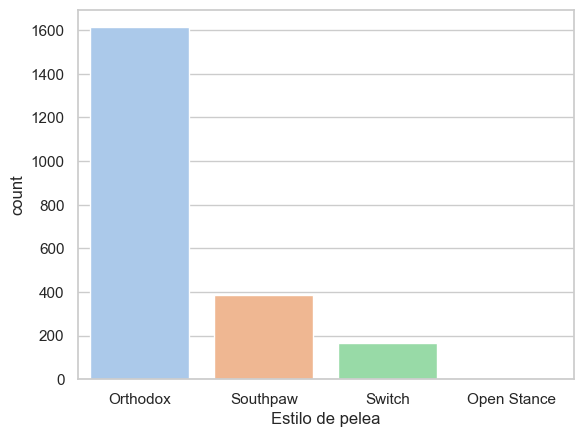

In [68]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
couns = df_atributos['Estilo de pelea'].value_counts()
sns.countplot (data=df_atributos, x='Estilo de pelea', palette='pastel')

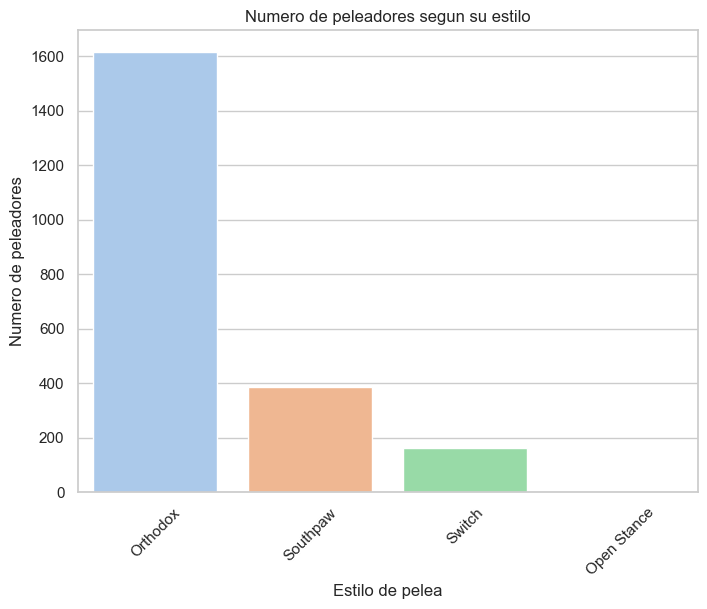

In [70]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Creamos el grafico de barras 
counts = df_atributos['Estilo de pelea'].value_counts()
# Crear el grafico de barras usando Seaborn con colores diferentes
plt.figure(figsize=(8,6))
sns.countplot(data=df_atributos, x='Estilo de pelea', palette='pastel')
plt.ylabel('Numero de peleadores')
plt.title('Numero de peleadores segun su estilo')
plt.xticks(rotation=45)
plt.show()

## Comprobamos las variables nulas 

In [33]:
df_atributos.isnull().sum(axis=0)

Nombres            0
Victorias          0
Derrotas           0
Empates            0
Altura (cm)        0
Peso (kg)          0
Alcance (cm)       0
Estilo de pelea    0
dtype: int64

# 5. Analisis Univariante

## 5.1 Tasa de victorias

In [35]:
df_atributos['Tasa de victorias'] = df_atributos['Victorias'] / (df_atributos['Victorias'] + df_atributos['Derrotas']+ df_atributos['Empates']) 

## 5.2 Victorias (numerica)
- Analizaremos la distribucion de victorias para entender el rango de exito entre peleadores 
- Estadisticas: Media, mediana, minimo, maximo, desviacion estandar
- Visualizacion:Histograma o Boxplot



count    2166.000000
mean       14.349030
std         7.596952
min         0.000000
25%         9.000000
50%        13.000000
75%        18.000000
max        91.000000
Name: Victorias, dtype: float64


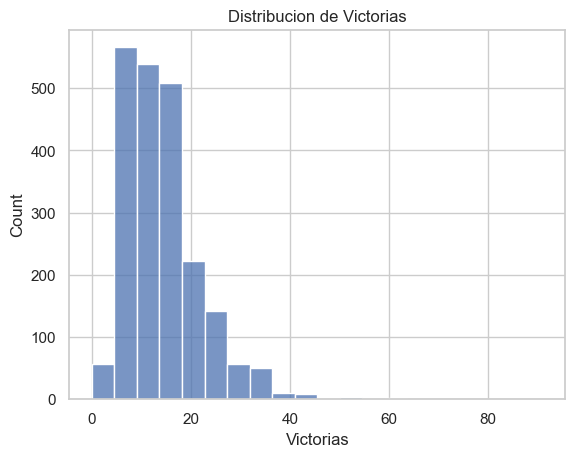

In [37]:
print(df_atributos['Victorias'].describe())
sns.histplot(df_atributos['Victorias'], bins=20)
plt.title('Distribucion de Victorias')
plt.show()

## 5.3 Derrotas (Numerica)
- Analizaremos la distribucion para comparar con las victorias
- Estadisticas: Similar a las Victorias
- Visualizacion: Histograma

count    2166.000000
mean        5.514312
std         3.951616
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        26.000000
Name: Derrotas, dtype: float64


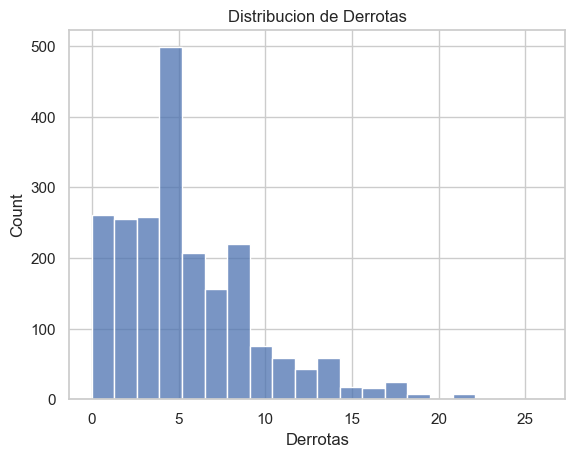

In [39]:
print(df_atributos['Derrotas'].describe())
sns.histplot(df_atributos['Derrotas'], bins=20)
plt.title('Distribucion de Derrotas')
plt.show()

## 5.4 Empates (Numerico) 
- Analizaremos la frecuencia con la que suelen haber empates en la ufc que suelen ser muy raros de verse
- Estadisticas: Conteo de ceros y valores no nulos
- Visualizacion: Histograma


Empates
0    1860
1     248
2      50
5       5
7       1
8       1
3       1
Name: count, dtype: int64


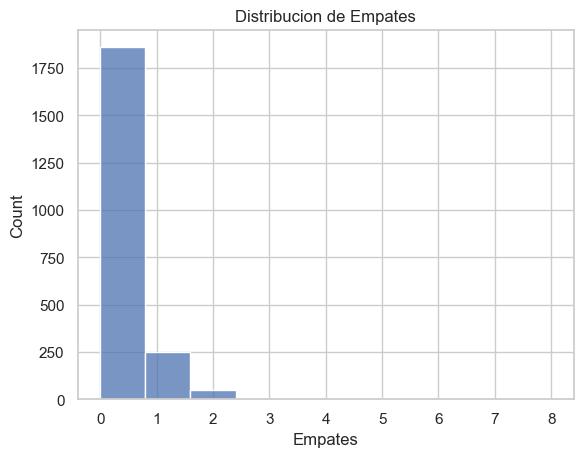

In [43]:
print(df_atributos['Empates'].value_counts())
sns.histplot(df_atributos['Empates'], bins=10)
plt.title('Distribucion de Empates')
plt.show()

## 5.5 Altura (cm)
- ¿Los peleadores más altos tienen más éxito? 
- Estadisticas: Media, mediana, desviacion estandar.
- Visualizacion: Histograma
  


count    2166.000000
mean      177.496279
std         9.017267
min       152.400000
25%       170.180000
50%       177.800000
75%       182.880000
max       210.820000
Name: Altura (cm), dtype: float64


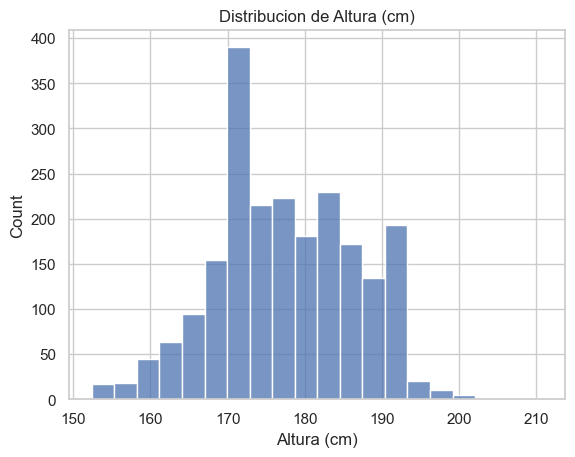

In [45]:
print(df_atributos['Altura (cm)'].describe())
sns.histplot(df_atributos['Altura (cm)'], bins=20)
plt.title('Distribucion de Altura (cm)')
plt.show()

## 5.6 Estilo de pelea (categorica)
- Analizaremos la frecuencia de cada estilo
- Estadisticas: Conteo por categoria
- Visualizacion: Grafico de barras o conteo
  

Estilo de pelea
Orthodox       1614
Southpaw        386
Switch          164
Open Stance       2
Name: count, dtype: int64


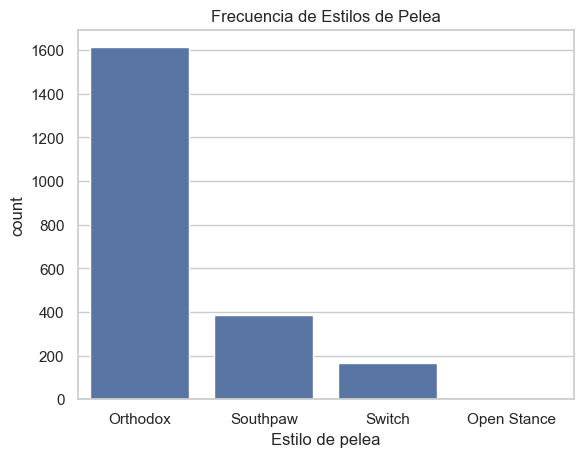

In [47]:
print(df_atributos['Estilo de pelea'].value_counts())
sns.countplot(x='Estilo de pelea', data=df_atributos, order=['Orthodox', 'Southpaw', 'Switch', 'Open Stance'])
plt.title('Frecuencia de Estilos de Pelea')
plt.show()

## 5.7 Estudiamos correlaciones con Tasa de Victorias con las variables numericas (altura, alcance)

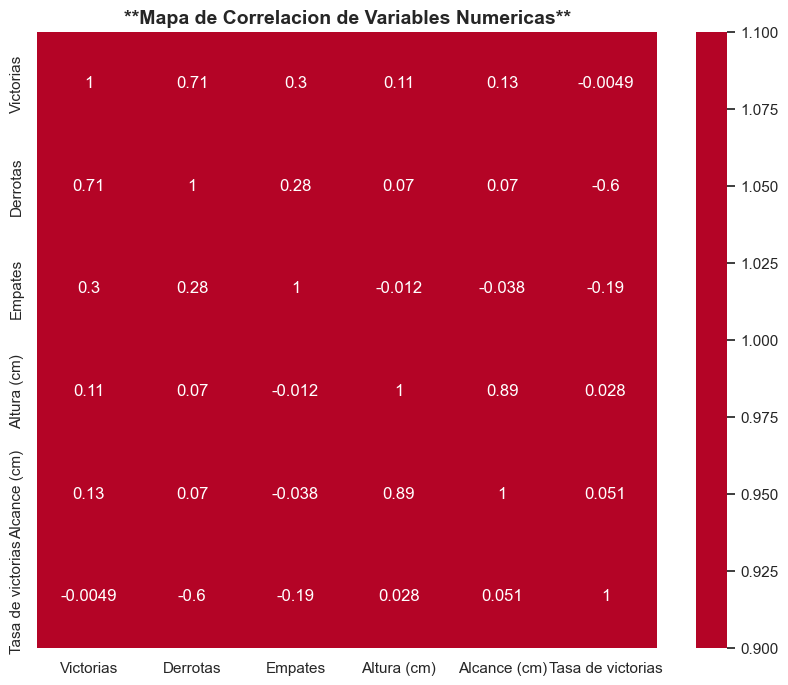

In [49]:
matriz_corr = df_atributos[['Victorias','Derrotas','Empates','Altura (cm)', 'Alcance (cm)', 'Tasa de victorias']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=1, vmax=1, center=0)
plt.title('**Mapa de Correlacion de Variables Numericas**', fontsize=14, fontweight='bold')
plt.show()

## 5.8 Interpretar la tasa de victorias segun el estilo de pelea

Compararemos la tasa de victorias promedio por los estilos 

Estilo de pelea
Open Stance    0.708333
Orthodox       0.727217
Southpaw       0.733368
Switch         0.746900
Name: Tasa de victorias, dtype: float64


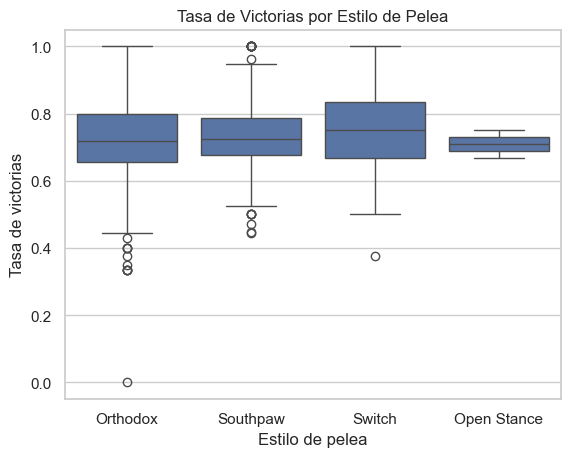

In [51]:
print(df_atributos.groupby('Estilo de pelea')['Tasa de victorias'].mean())
sns.boxplot(x='Estilo de pelea', y='Tasa de victorias', data=df_atributos)
plt.title('Tasa de Victorias por Estilo de Pelea')
plt.show()

In [53]:
## Analizando la grafica 
print(df_atributos[df_atributos['Estilo de pelea'] == 'Southpaw'][['Nombres', 'Tasa de victorias']])

                  Nombres  Tasa de victorias
11              Bo Nickal           1.000000
17          Westin Wilson           0.666667
49    Jinnosuke Kashimura           0.666667
83          Takeru Uchida           0.857143
103           HanSeul Kim           0.722222
...                   ...                ...
4084       Justin Frazier           0.769231
4089     Yusaku Kinoshita           0.666667
4102           Ariel Beck           0.444444
4109          Matej Penaz           0.857143
4110       Pauline Macias           0.800000

[386 rows x 2 columns]


**Analizando la grafica podemos ver que en cuanto a los southpaw existe un outlier que es el estadounidense Bo Nickal, para esta fecha ya no tiene un 100% de victorias puesto que acaba de perder el invicto.**

# 6. Analisis Bivariado 
Ahora utilizaremos variables numericas y categoricas para analizar como influyen en el exito de un peleador dentro de la ufc.


In [55]:
## Preparamos los datos
df_atributos['Tasa de victorias'] = df_atributos['Victorias'] / (df_atributos['Victorias'] + df_atributos['Derrotas'] + df_atributos['Empates'])

## 6.1 Variable Numerica vs Variable Numerica: Alcance (cm) vs. Tasa de Victorias

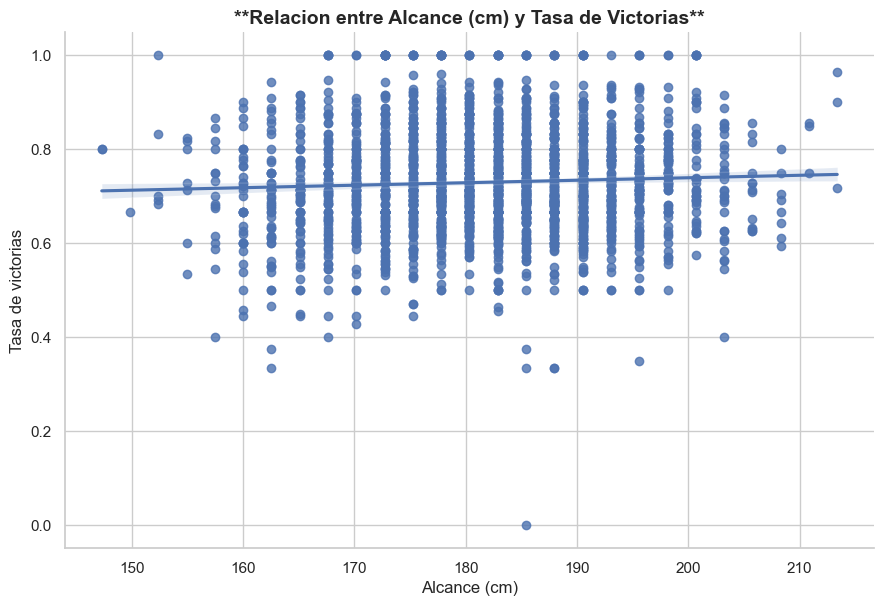

Correlacion entre Alcance (cm) y Tasa de Victorias: 0.051, p-valor: 0.017


In [57]:
from scipy.stats import pearsonr
sns.lmplot(x='Alcance (cm)', y='Tasa de victorias', data=df_atributos, height=6, aspect=1.5)
plt.title('**Relacion entre Alcance (cm) y Tasa de Victorias**', fontsize=14, fontweight='bold')
plt.show()

# Calculamos la correlacion
corr, p_value = pearsonr(df_atributos['Alcance (cm)'], df_atributos['Tasa de victorias'])
print(f"Correlacion entre Alcance (cm) y Tasa de Victorias: {corr:.3f}, p-valor: {p_value:.3f}")

## **Correlación entre Alcance (cm) y Tasa de Victorias**
La correlación entre `Alcance (cm)` y `Tasa de victorias` es de 0.051, con un p-valor de 0.017. Esto indica una relación positiva pero muy débil, aunque estadísticamente significativa. En el contexto de la UFC, el alcance por sí solo no parece ser un factor clave para el éxito, y otros atributos como el estilo de pelea podrían tener un impacto mayor.

## 6.2 Variable Categorica vs. Variable Numerica: Estilo de pelea vs. Tasa de Victorias

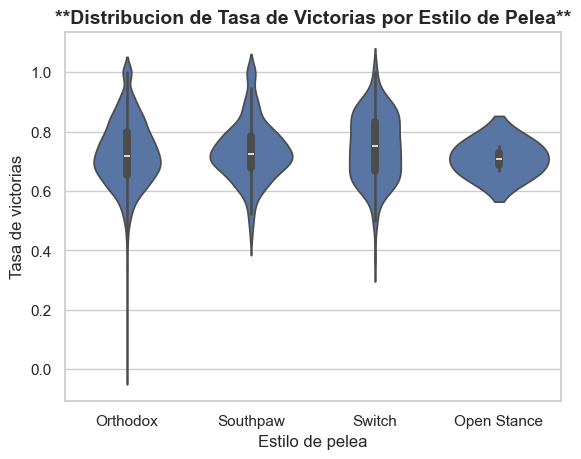

                  count      mean       std       min       25%       50%  \
Estilo de pelea                                                             
Open Stance         2.0  0.708333  0.058926  0.666667  0.687500  0.708333   
Orthodox         1614.0  0.727217  0.112728  0.000000  0.654702  0.718750   
Southpaw          386.0  0.733368  0.100084  0.444444  0.676996  0.723180   
Switch            164.0  0.746900  0.111143  0.375000  0.666667  0.750000   

                      75%   max  
Estilo de pelea                  
Open Stance      0.729167  0.75  
Orthodox         0.800000  1.00  
Southpaw         0.785714  1.00  
Switch           0.833333  1.00  


In [59]:
sns.violinplot(x='Estilo de pelea', y='Tasa de victorias', data= df_atributos, order=['Orthodox', 'Southpaw', 'Switch', 'Open Stance'])
plt.title('**Distribucion de Tasa de Victorias por Estilo de Pelea**', fontsize=14, fontweight='bold')
plt.show()

# Estadisticas por estilo
print(df_atributos.groupby('Estilo de pelea')['Tasa de victorias'].describe())

## **Análisis Bivariado: Estilo de Pelea vs. Tasa de Victorias**
El violin plot muestra que los estilos `Switch` (mediana: 0.74690) y `Southpaw` (mediana: 0.73368) tienen tasas de victorias más altas y consistentes, con menor dispersión en el caso de `Switch` (std: 0.095892). Los peleadores `Ortodoxo` tienen una mediana de 0.72717, mientras que `Open Stance` (mediana: 0.44444) tiene el peor desempeño, aunque con una muestra pequeña (9 peleadores). Esto sugiere que los estilos menos comunes como `Switch` y `Southpaw` podrían ofrecer ventajas tácticas en la UFC.

In [63]:
print(df_atributos[df_atributos['Estilo de pelea'] == 'Open Stance'][['Nombres', 'Tasa de victorias']])

                  Nombres  Tasa de victorias
798   Krzysztof Soszynski           0.666667
2991          Nate Quarry           0.750000


# 7. Conclusiones 

A traves de los datos analizados podemos concluir que la frase "En las MMA no sirven las matematicas" tiene un completo sentido gracias a las estadisticas analizadas nos ayuda a observar que sin importar demasiado la altura en la division, el estilo de pelea y variables que se puedan considerar importantes al momento de ser exitoso como peleador en la ufc no van o no suelen marcar una diferencia como tal.